# Pet Finder - Adopción de Mascotas

PetFinder.es una plataforma de adopción de Mascotas de Malasia, con una base de datos de más de 150.000 animales. 

Las tasas de adopción de animales están fuertemente correlacionadas con los metadatos asociados con sus perfiles en línea, como el texto descriptivo y las características de las fotografías. Como ejemplo, PetFinder está experimentando actualmente con una herramienta de inteligencia artificial simple llamada Cuteness Meter, que clasifica qué tan linda es una mascota en función de las cualidades presentes en sus fotos.

En esta competencia, desarrollará algoritmos para predecir la adoptabilidad de las mascotas, específicamente, ¿qué tan rápido se adopta una mascota?

Web Organización: https://www.petfinder.my/

Datos: https://www.kaggle.com/c/petfinder-adoption-prediction



## Script Inicial - Análisis Exploratorio

En este trabajo se busca predecir la velocidad a la que se adopta una mascota, según la lista de la mascota en PetFinder. 

A veces, un perfil representa a un grupo de mascotas. En este caso, la velocidad de adopción está determinada por la velocidad a la que se adoptan todas las mascotas. 

Los datos incluyen datos de **Texto Libre**, **Datos Tabulares** e **Emágenes**, lo que lo hace un dataset sumamente rico para explorar

### Ejemplos de Scripts de EDA (Exploratory Data Analysis)

* En R: https://www.kaggle.com/jaseziv83/an-extensive-eda-of-petfinder-my-data
* En Python: https://www.kaggle.com/artgor/exploration-of-data-step-by-step

File descriptions:

* train.csv - Tabular/text data for the training set
* test.csv - Tabular/text data for the test set
* sample_submission.csv - A sample submission file in the correct format
* breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
* color_labels.csv - Contains ColorName for each ColorID
* state_labels.csv - Contains StateName for each StateID

In [127]:
# Importación de Librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

%matplotlib inline
pd.set_option('display.max_columns', 30)
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [128]:
# Datos Tabulares
train = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')

In [129]:
train.shape

(14993, 24)

### Data Fields

* PetID - Unique hash ID of pet profile
* AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
* Type - Type of animal (1 = Dog, 2 = Cat)
* Name - Name of pet (Empty if not named)
* Age - Age of pet when listed, in months
* Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
* Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
* Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
* Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
* Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
* MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
* Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* Quantity - Number of pets represented in profile
* Fee - Adoption fee (0 = Free)
* State - State location in Malaysia (Refer to StateLabels dictionary)
* RescuerID - Unique hash ID of rescuer
* VideoAmt - Total uploaded videos for this pet
* PhotoAmt - Total uploaded photos for this pet
* Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

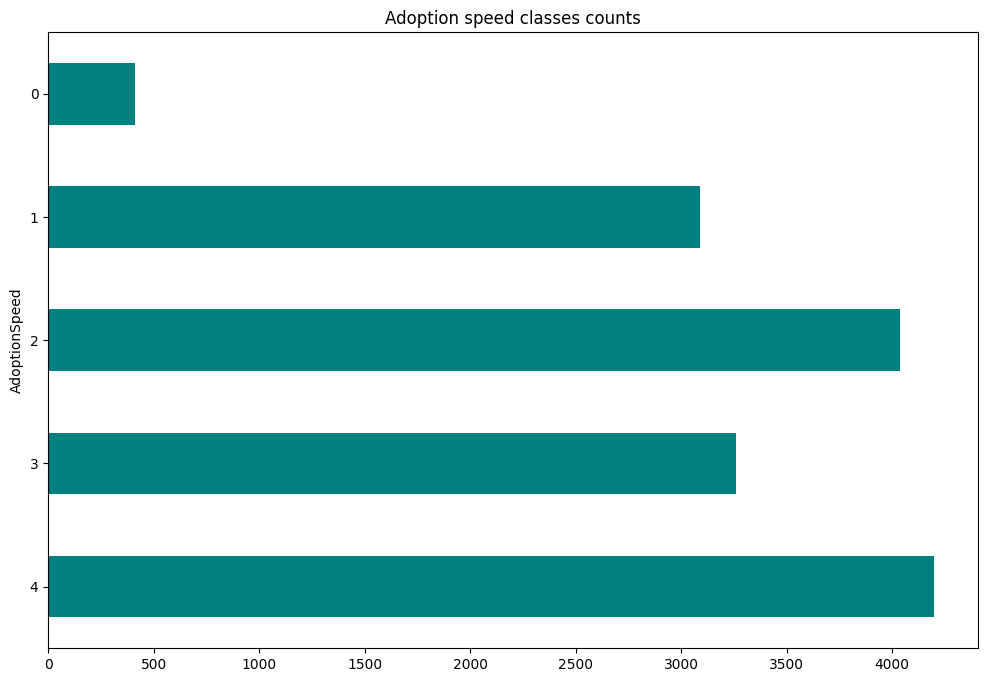

In [130]:
train['AdoptionSpeed'].value_counts().sort_index(ascending = False).plot(kind='barh', color='teal');
plt.title('Adoption speed classes counts');

### Target: AdoptionSpeed

The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:

* 0 - Pet was adopted on the same day as it was listed.
* 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
* 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
* 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
* 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

In [131]:
# Mapeamos el Tipo de Mascota
train['Type'] = train['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')

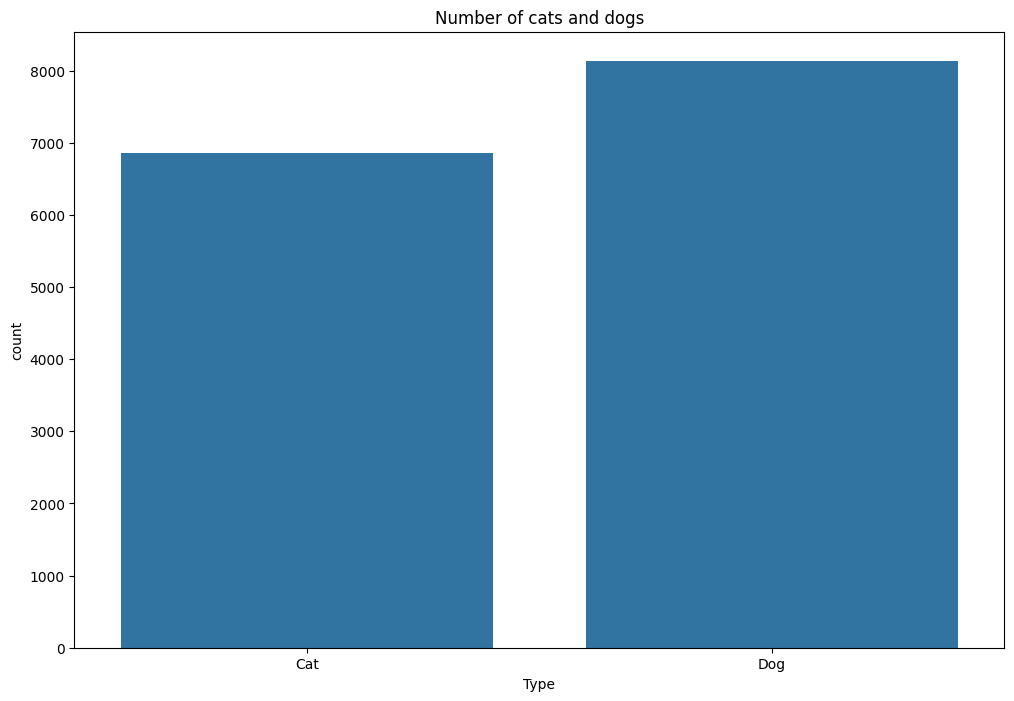

In [132]:
sns.countplot(x='Type', data=train);
plt.title('Number of cats and dogs');

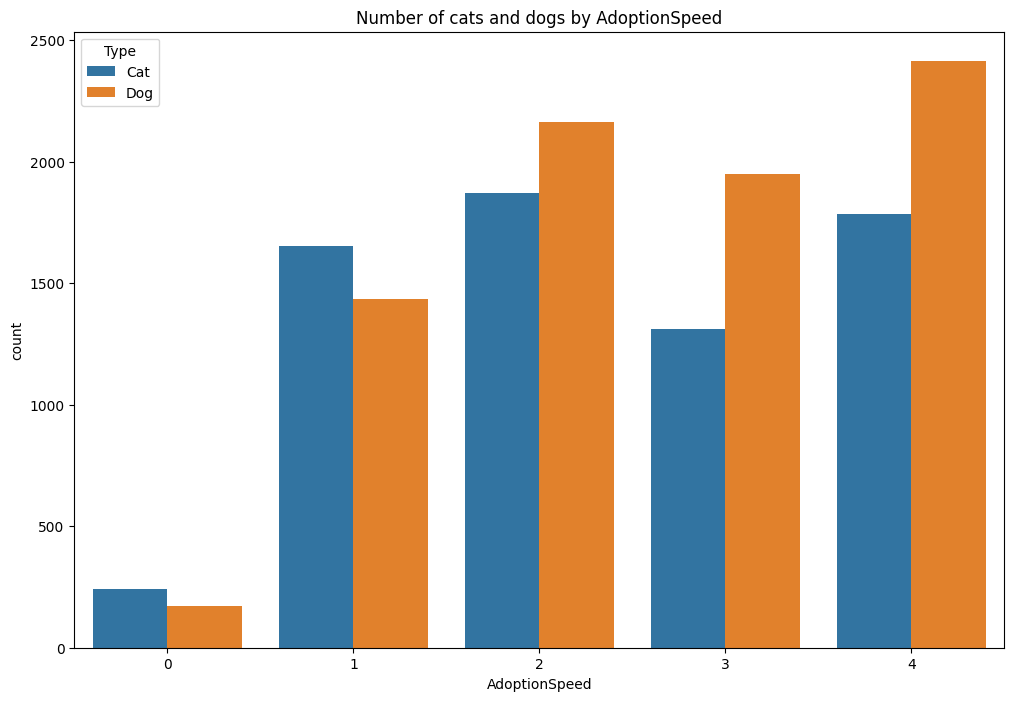

In [133]:
sns.countplot(x='AdoptionSpeed', data=train, hue='Type');
plt.title('Number of cats and dogs by AdoptionSpeed');

In [134]:
train.Name.value_counts()

Name
Baby                      66
Lucky                     64
No Name                   54
Brownie                   54
Mimi                      52
                          ..
Maroo                      1
4 PUPPIES FOR ADOPTION     1
Trish                      1
Lab Mix Puppy 2            1
Fili                       1
Name: count, Length: 9059, dtype: int64

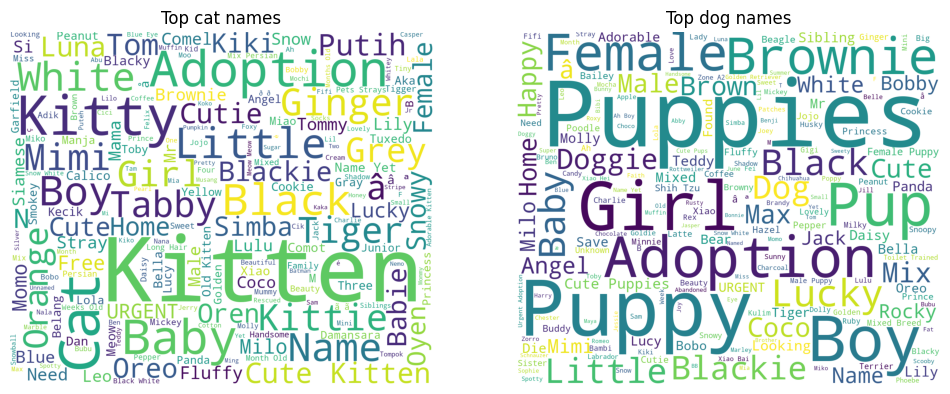

In [135]:
plt.subplot(1, 2, 1)
text_cat = ' '.join(train.loc[train['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(train.loc[train['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

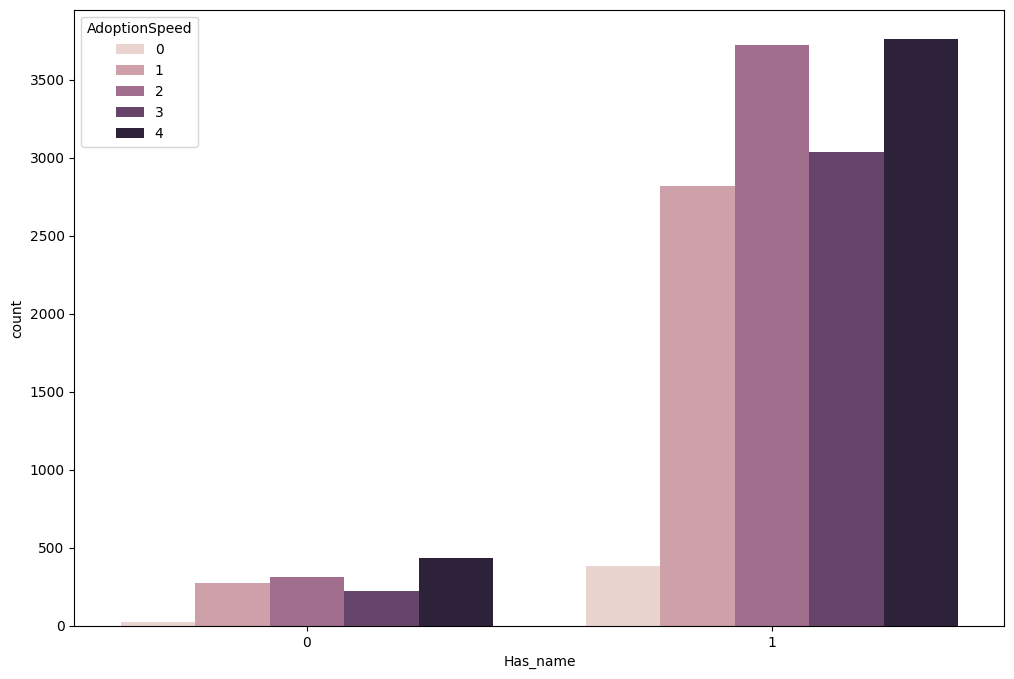

In [136]:
train['Name'] = train['Name'].fillna('Unnamed')
train['Has_name'] = 1
train.loc[train['Name'] == 'Unnamed', 'Has_name'] = 0

sns.countplot(x='Has_name', data=train, hue='AdoptionSpeed');

Text(0.5, 1.0, 'Distribution of pets age in Months')

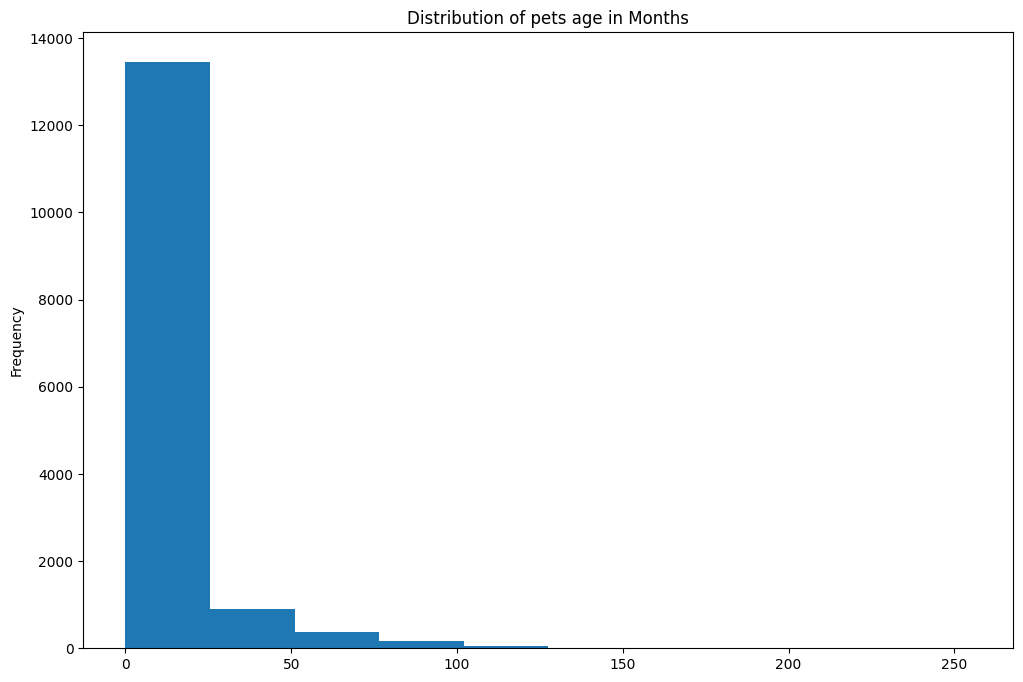

In [137]:
train['Age'].plot(kind='hist')
plt.title('Distribution of pets age in Months')

## Tareas a Realizar

#### Pre-procesamiento:

* Chequear Nulos y Decidir si Imputar o Descartar
* Chequear Variables Categóricas y convertirlas en Numéricas
* Estandarizar o Normalizar

#### Ideas para EDA:

* Analizar la Raza de las Mascotas
* Analizar el Género
* Analizar los 3 Colores Informados para cada Mascota
* Estudiar las variables de Salud: Vacunación, Esterilización, Desparacitación
* Entender el impacto del Fee cobrado
* Estudiar las Regiones Geográficas disponibles
* Analizar el impacto de tener Fotos y/o Videos

Todos estos análisis pueden hacerse en función de la Especie (Gato/Perro) y respecto al Target



### 1. Pre-procesamiento
1.a. Chequear Nulos y Decidir si Imputar o Descartar

In [138]:
train.isnull().sum()

Type              0
Name              0
Age               0
Breed1            0
Breed2            0
Gender            0
Color1            0
Color2            0
Color3            0
MaturitySize      0
FurLength         0
Vaccinated        0
Dewormed          0
Sterilized        0
Health            0
Quantity          0
Fee               0
State             0
RescuerID         0
VideoAmt          0
Description      13
PetID             0
PhotoAmt          0
AdoptionSpeed     0
Has_name          0
dtype: int64

In [139]:
train[train['Name']=="Unnamed"]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Has_name
5,Cat,Unnamed,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,0
8,Cat,Unnamed,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,0
19,Cat,Unnamed,1,266,0,3,1,2,7,1,1,2,2,2,1,5,0,41326,b752f78276215f44581eeb6eea1e63bc,0,"Birth Date: Oct 30th Kitty 1, Melly -Female Sa...",b10e7605a,1.0,4,0
33,Cat,Unnamed,4,266,0,2,1,6,7,1,1,2,2,2,1,2,0,41326,7d58438884ab468dce87c7e252bbd6e4,0,Two gorgeous kittens have just lost their mumm...,9415bc79e,7.0,3,0
36,Cat,Unnamed,24,265,292,2,1,4,0,2,2,1,1,3,1,3,0,41326,90b00f90ffdf9ec1cac529a2bbef3ecc,0,she fat n healthy. in door cat,61fa73996,2.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14871,Dog,Unnamed,2,307,0,2,4,7,0,2,1,2,2,2,1,1,0,41324,c8ea0bc42e630c72747986c4c0ce36aa,0,mixed breed. interested please kindly email me,5aff9022b,1.0,4,0
14930,Dog,Unnamed,12,307,307,1,2,7,0,2,2,3,3,3,1,1,0,41401,5c4ddaeafcbdfca6d291c6d010f1c35c,0,Friendly and loyal mongrel looking for a home....,1f70f8112,3.0,1,0
14935,Cat,Unnamed,1,243,0,3,2,3,4,2,1,2,2,2,1,2,0,41336,8d3049f2bb476520449863435ad067ec,0,the 2 kittens follow my friend into our house(...,811b66c3e,5.0,1,0
14984,Dog,Unnamed,60,307,0,2,2,5,0,2,2,3,3,3,1,1,0,41324,c8ea0bc42e630c72747986c4c0ce36aa,0,"abandoned,but healthy",f5dc70d35,1.0,4,0


In [140]:
train[train['Description'].isnull()]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Has_name
96,Cat,Manja,19,285,0,2,1,6,0,3,3,1,1,2,1,1,0,41401,12c51d7222986fbf000db9061f5082be,0,NaN,5e4154870,3.0,1,1
605,Cat,Mickey,2,264,0,1,1,7,0,2,2,2,2,2,1,1,0,41401,bb7e38ebd628443cefb56024635dd647,0,NaN,56583003c,3.0,4,1
1098,Cat,Pucci,6,266,292,1,1,6,0,1,1,1,1,3,1,1,0,41326,90b00f90ffdf9ec1cac529a2bbef3ecc,0,NaN,8c4c4bc6e,1.0,4,1
2109,Dog,Chelsea And Sherbert,31,307,0,2,1,2,7,2,2,1,1,1,1,2,0,41401,c814d8b7928da23e3add9ec4d270de95,0,NaN,50eddd1bb,3.0,2,1
4218,Cat,Mog,84,266,0,1,3,0,0,3,1,1,1,1,1,1,0,41401,bc630ee7cec2fa789b0412ff798df83f,0,NaN,9d82e4438,5.0,2,1
4904,Cat,Brumby,2,299,0,1,1,7,0,2,1,2,1,2,1,1,0,41326,744fa4278196568a18fcf5cd7d324ed2,0,NaN,ba16888d7,2.0,2,1
6041,Cat,Oshin & Lola,3,254,254,2,2,7,0,1,1,2,2,3,1,2,0,41326,6a33f105d818ce64de49a0b83a33b35a,0,NaN,4ec25bc3b,4.0,3,1
8674,Cat,KANTHAKA,2,299,0,2,1,7,0,2,1,2,1,2,1,1,0,41326,744fa4278196568a18fcf5cd7d324ed2,0,NaN,97f0a97ef,1.0,2,1
10272,Dog,Unknown,0,307,0,1,5,7,0,2,2,3,3,3,2,1,0,41326,f0997d267a9acadd44a5301a18f83df5,0,NaN,f67786a70,0.0,4,1
11365,Cat,J,25,292,292,1,2,0,0,3,1,1,1,1,1,1,0,41326,0bda3ae2e5c78a3b2ff9a725dbe42161,0,NaN,f775ef952,1.0,2,1


1.b. Chequear Variables Categóricas y convertirlas en Numéricas

In [141]:
train.select_dtypes(include=['object', 'category']).columns

Index(['Type', 'Name', 'RescuerID', 'Description', 'PetID'], dtype='object')

In [142]:
train = pd.get_dummies(train, columns=['Type'], drop_first=True)
train['RescuerID'] = train['RescuerID'].astype('category').cat.codes

1.c. Estandarizar o Normalizar

In [143]:
from sklearn.preprocessing import StandardScaler

cols_a_estandarizar = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']

scaler = StandardScaler()
train[cols_a_estandarizar] = scaler.fit_transform(train[cols_a_estandarizar])

###2. Ideas para EDA:

* Analizar la Raza de las Mascotas
* Analizar el Género
* Analizar los 3 Colores Informados para cada Mascota
* Estudiar las variables de Salud: Vacunación, Esterilización, Desparacitación
* Entender el impacto del Fee cobrado
* Estudiar las Regiones Geográficas disponibles
* Analizar el impacto de tener Fotos y/o Videos

Todos estos análisis pueden hacerse en función de la Especie (Gato/Perro) y respecto al Target

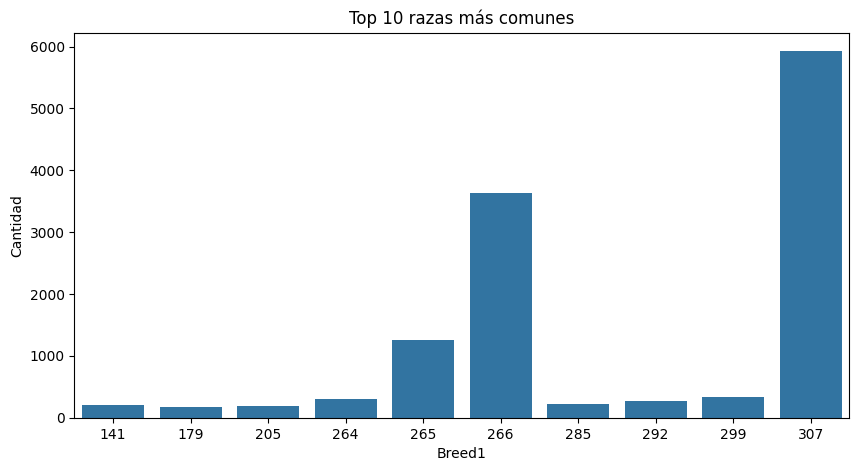

In [144]:
# 1. RAZAS
plt.figure(figsize=(10, 5))
top_breeds = train['Breed1'].value_counts().head(10)
sns.barplot(x=top_breeds.index, y=top_breeds.values)
plt.title('Top 10 razas más comunes')
plt.xlabel('Breed1')
plt.ylabel('Cantidad')
plt.show()

In [145]:
train['Breed1'].value_counts()

Breed1
307    5927
266    3634
265    1258
299     342
264     296
       ... 
176       1
214       1
125       1
123       1
81        1
Name: count, Length: 176, dtype: int64

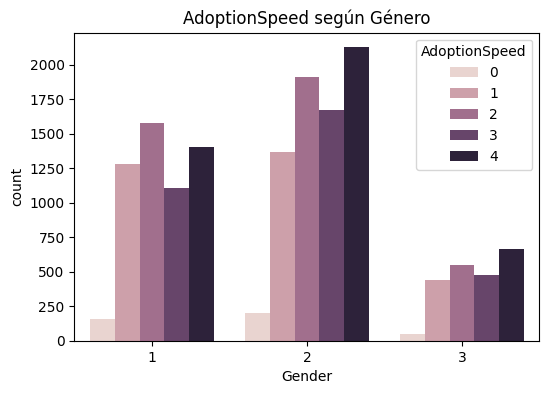

In [146]:
# 2. GÉNERO vs AdoptionSpeed
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Gender', hue='AdoptionSpeed')
plt.title('AdoptionSpeed según Género')
plt.show()

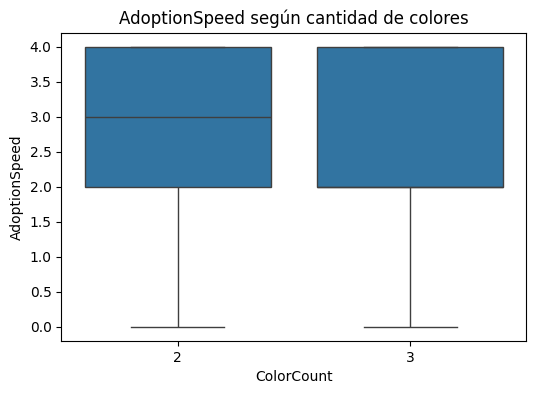

In [147]:
# 3. COLORES (unificar en cantidad de colores distintos)
train['ColorCount'] = train[['Color1', 'Color2', 'Color3']].nunique(axis=1)

plt.figure(figsize=(6, 4))
sns.boxplot(data=train, x='ColorCount', y='AdoptionSpeed')
plt.title('AdoptionSpeed según cantidad de colores')
plt.show()

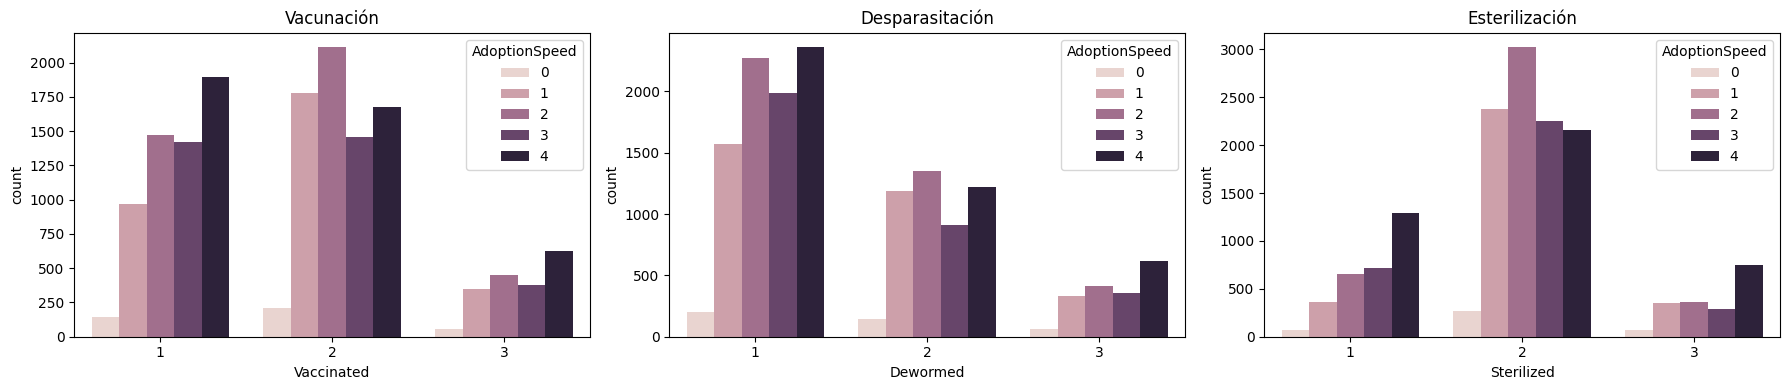

In [148]:
# 4. SALUD
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
sns.countplot(data=train, x='Vaccinated', hue='AdoptionSpeed', ax=axs[0])
sns.countplot(data=train, x='Dewormed', hue='AdoptionSpeed', ax=axs[1])
sns.countplot(data=train, x='Sterilized', hue='AdoptionSpeed', ax=axs[2])
axs[0].set_title('Vacunación')
axs[1].set_title('Desparasitación')
axs[2].set_title('Esterilización')
plt.tight_layout()
plt.show()

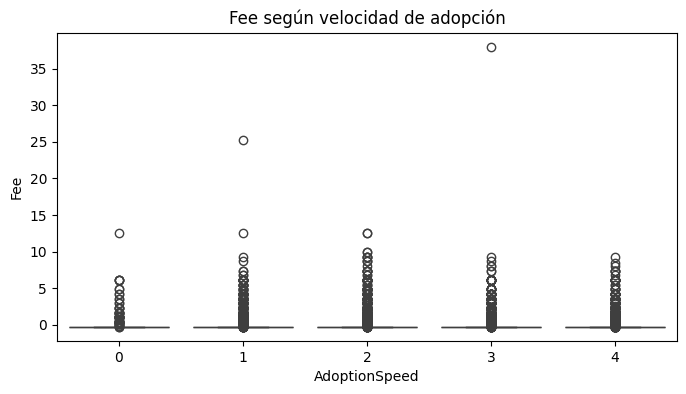

In [149]:
# 5. FEE
plt.figure(figsize=(8, 4))
sns.boxplot(data=train, x='AdoptionSpeed', y='Fee')
plt.title('Fee según velocidad de adopción')
plt.show()

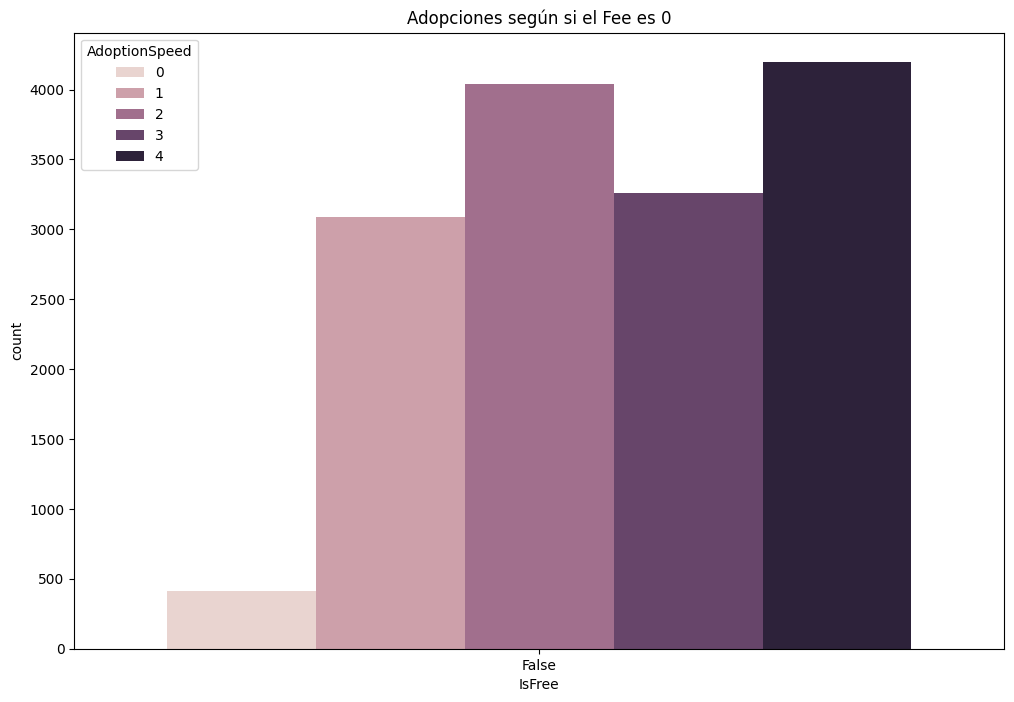

In [150]:
# Opción binaria: ¿la mascota es gratuita?
train['IsFree'] = train['Fee'] == 0
sns.countplot(data=train, x='IsFree', hue='AdoptionSpeed')
plt.title('Adopciones según si el Fee es 0')
plt.show()

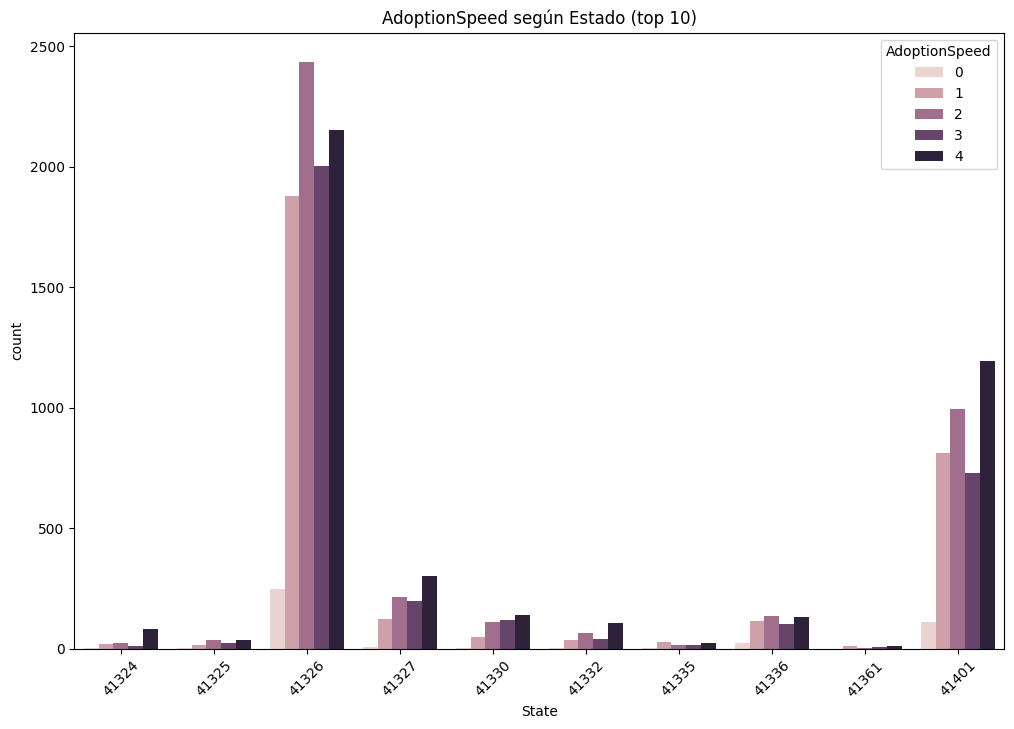

In [151]:
# 6. REGIONES (State)
top_states = train['State'].value_counts().head(10)
sns.countplot(data=train[train['State'].isin(top_states.index)], x='State', hue='AdoptionSpeed')
plt.title('AdoptionSpeed según Estado (top 10)')
plt.xticks(rotation=45)
plt.show()

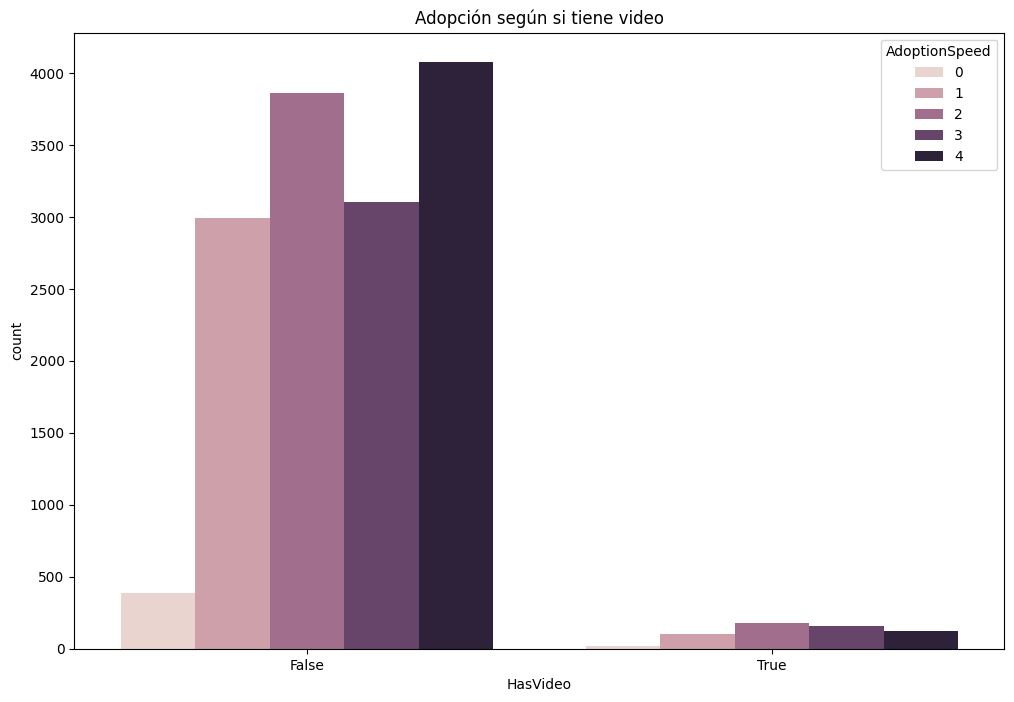

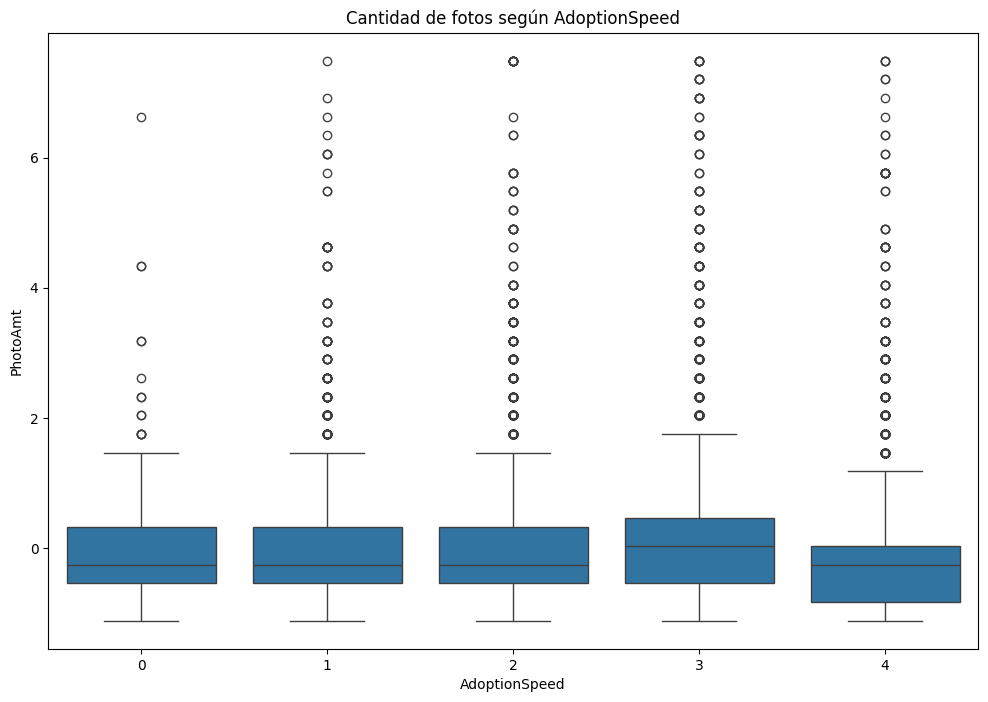

In [152]:
# 7. FOTOS y VIDEOS
train['HasVideo'] = train['VideoAmt'] > 0
train['HasPhoto'] = train['PhotoAmt'] > 0

sns.countplot(data=train, x='HasVideo', hue='AdoptionSpeed')
plt.title('Adopción según si tiene video')
plt.show()

sns.boxplot(data=train, x='AdoptionSpeed', y='PhotoAmt')
plt.title('Cantidad de fotos según AdoptionSpeed')
plt.show()

## EL MODELO

In [157]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Definimos target y features
# Definimos el target
target = 'AdoptionSpeed'

# Excluir columnas no predictoras
cols_excluir = ['PetID', 'Name', 'Description']  # o lo que no quieras usar
features = [col for col in train.columns if col not in cols_excluir + [target]]

# Creamos los conjuntos de datos
X = train[features]
y = train[target]

# Verificamos las columnas disponibles
print(X.columns)


cat_features = ['Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 
                'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 
                'Health', 'State', 'RescuerID', 'Has_name', 'Type_Dog', 'ColorCount']

num_features = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']

# Verificamos valores nulos en las características
print("Columnas con valores nulos:", X[cat_features + num_features].isnull().sum().sum())

# Codificamos variables categóricas que sean de tipo objeto
for col in cat_features:
    if col in X.columns and X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111111)

# Creamos y entrenamos el modelo LightGBM
params = {
    'objective': 'multiclass',
    'num_class': 5,  # AdoptionSpeed tiene 5 categorías (0-4)
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'max_depth': 6,
    'verbose': -1,
    'early_stopping_rounds': 50  # Movido dentro de los parámetros
}

# Creamos el conjunto de datos para LightGBM
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_features)
valid_data = lgb.Dataset(X_test, label=y_test, categorical_feature=cat_features, reference=train_data)

# Entrenamos el modelo
model = lgb.train(
    params,
    train_data,
    num_boost_round=500,
    valid_sets=[valid_data]
    # early_stopping_rounds se ha movido a los parámetros
)

# Evaluamos el modelo
y_pred = model.predict(X_test)
y_pred_class = y_pred.argmax(axis=1)

# Mostramos el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_class))

# Características más importantes
print("\nCaracterísticas más importantes:")
importance = model.feature_importance(importance_type='gain')
feature_names = model.feature_name()
feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
for feature, importance in feature_importance[:10]:
    print(f"{feature}: {importance}")

Index(['Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt',
       'PhotoAmt', 'Has_name', 'Type_Dog', 'ColorCount', 'IsFree', 'HasVideo',
       'HasPhoto'],
      dtype='object')
Columnas con valores nulos: 0

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.23      0.07      0.11        80
           1       0.41      0.38      0.40       632
           2       0.37      0.37      0.37       805
           3       0.42      0.24      0.30       645
           4       0.52      0.76      0.62       837

    accuracy                           0.44      2999
   macro avg       0.39      0.36      0.36      2999
weighted avg       0.43      0.44      0.42      2999


Características más importantes:
RescuerID: 28267.536066889763
Age: 15839.867487525731
Breed1: 11805.49196028709

In [158]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred_class, weights='quadratic')

0.39824751407521664